<a href="https://colab.research.google.com/github/dhanush852/intro_to-ml/blob/main/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [ ]:
#Use the URL for the raw CSV data
url = 'https://raw.githubusercontent.com/dhanush852/intro_to-ml/main/Housing.csv'
raw_df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
raw_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no':0})

raw_df[binary_cols] = raw_df[binary_cols].apply(binary_map)
raw_df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
np.random.seed(0)
raw_df_train, raw_df_test = train_test_split(raw_df, test_size = 0.2)
raw_df_train.shape,raw_df_test.shape


((436, 13), (109, 13))

In [ ]:
def loss(X_values, Y_values, theta, m): #1
    h = X_values.dot(theta)
    err = np.subtract(h,Y_values)
    squareErr = np.square(err)
    loss_value = 1/(2*m) * np.sum(squareErr)
    return loss_value


In [ ]:
def linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, iterations):#1
    training_loss_hist = np.zeros(iterations)
    validation_loss_hist = np.zeros(iterations)
    for i in range(iterations):
        h = X_train.dot(theta)
        err = np.subtract(h,Y_train)
        xy_dtheta = (1/len(Y_train)) * X_train.transpose().dot(err)
        theta = theta - alpha*xy_dtheta
        training_loss_hist[i] = loss(X_train, Y_train, theta, m_train)
        validation_loss_hist[i] = loss(X_test, Y_test, theta, m_test)
    return theta, training_loss_hist, validation_loss_hist


In [ ]:
categorical_cols_1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

Y_train = raw_df_train[['price']].to_numpy()

m_train = len(Y_train)

X_train = raw_df_train[categorical_cols_1].to_numpy()
X_train = np.hstack((np.ones((m_train, 1)), X_train))

Y_test = raw_df_test[['price']].to_numpy()

m_test = len(Y_test)

X_test = raw_df_test[categorical_cols_1].to_numpy()
X_test = np.hstack((np.ones((m_test, 1)), X_test))

In [ ]:
iterations = 500
alpha = 0.000000001

theta = np.zeros((6,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, iterations)


Text(0.5, 1.0, '1A: Training Loss per Iteration')

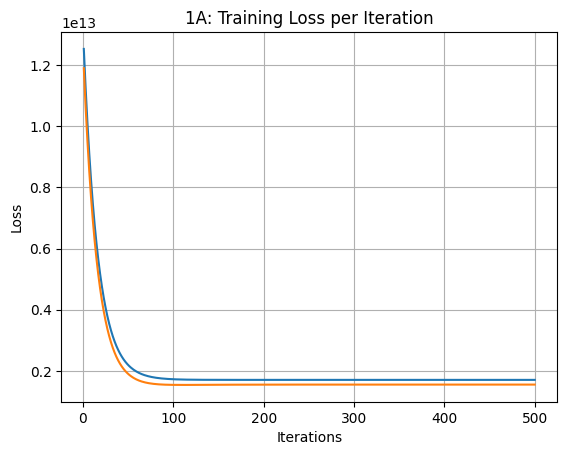

In [ ]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('1A: Training Loss per Iteration')


In [ ]:
categorical_cols_2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

Y_train = raw_df_train[['price']].to_numpy()

m_train = len(Y_train)

X_train = raw_df_train[categorical_cols_2].to_numpy()
X_train = np.hstack((np.ones((m_train, 1)), X_train))

Y_test = raw_df_test[['price']].to_numpy()

m_test = len(Y_test)

X_test = raw_df_test[categorical_cols_2].to_numpy()
X_test = np.hstack((np.ones((m_test, 1)), X_test))

In [ ]:
X_train.shape

(436, 12)

In [ ]:
iterations = 500
alpha = 0.000000001

theta = np.zeros((12,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, iterations)

In [ ]:
validation_loss_hist

array([1.18966766e+13, 1.12421467e+13, 1.06283522e+13, 1.00527784e+13,
       9.51306473e+12, 9.00699618e+12, 8.53249380e+12, 8.08760656e+12,
       7.67050349e+12, 7.27946628e+12, 6.91288237e+12, 6.56923847e+12,
       6.24711445e+12, 5.94517762e+12, 5.66217740e+12, 5.39694019e+12,
       5.14836473e+12, 4.91541762e+12, 4.69712915e+12, 4.49258936e+12,
       4.30094445e+12, 4.12139324e+12, 3.95318397e+12, 3.79561129e+12,
       3.64801337e+12, 3.50976922e+12, 3.38029622e+12, 3.25904773e+12,
       3.14551086e+12, 3.03920445e+12, 2.93967706e+12, 2.84650518e+12,
       2.75929148e+12, 2.67766323e+12, 2.60127076e+12, 2.52978607e+12,
       2.46290145e+12, 2.40032827e+12, 2.34179580e+12, 2.28705009e+12,
       2.23585293e+12, 2.18798092e+12, 2.14322452e+12, 2.10138720e+12,
       2.06228465e+12, 2.02574402e+12, 1.99160321e+12, 1.95971022e+12,
       1.92992249e+12, 1.90210636e+12, 1.87613652e+12, 1.85189545e+12,
       1.82927296e+12, 1.80816577e+12, 1.78847704e+12, 1.77011599e+12,
      

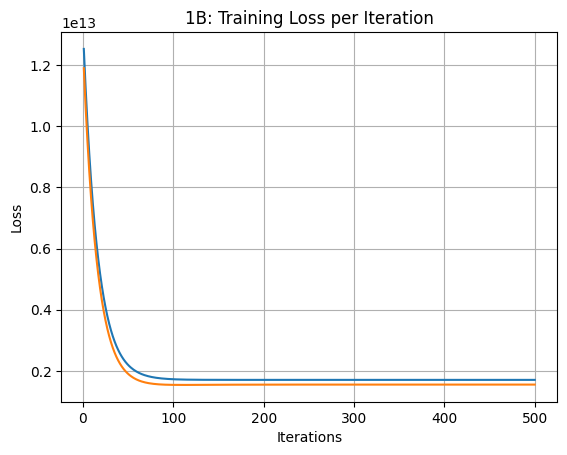

In [ ]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('1B: Training Loss per Iteration')
plt.show()

In [ ]:
def feature_scaling(raw_df_train, raw_df_test, categorical_cols, scaler):
    df_nrm_train = raw_df_train
    df_nrm_train[['price']] = scaler.fit_transform(raw_df_train[['price']])
    df_nrm_train[categorical_cols] = scaler.fit_transform(raw_df_train[categorical_cols])
    Y_nrm_train = df_nrm_train[['price']].to_numpy()
    m_nrm_train = len(Y_nrm_train)
    X_nrm_train = df_nrm_train[categorical_cols].to_numpy()
    X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))
    df_nrm_test = raw_df_test
    df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
    df_nrm_test[categorical_cols] = scaler.fit_transform(df_nrm_test[categorical_cols])
    Y_nrm_test = df_nrm_test[['price']].to_numpy()
    m_nrm_test = len(Y_nrm_test)
    X_nrm_test = df_nrm_test[categorical_cols].to_numpy()
    X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))
    return X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
df_nrm_train = raw_df_train
df_nrm_train[['price']] = scaler.fit_transform(raw_df_train[['price']])
df_nrm_train[categorical_cols_1] = scaler.fit_transform(raw_df_train[categorical_cols_1])
Y_nrm_train = df_nrm_train[['price']].to_numpy()
m_nrm_train = len(Y_nrm_train)
X_nrm_train = df_nrm_train[categorical_cols_1].to_numpy()
X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))


In [ ]:
df_nrm_test = raw_df_test

df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
df_nrm_test[categorical_cols_1] = scaler.fit_transform(df_nrm_test[categorical_cols_1])

Y_nrm_test = df_nrm_test[['price']].to_numpy()

m_nrm_test = len(Y_nrm_test)

X_nrm_test = df_nrm_test[categorical_cols_1].to_numpy()
X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))


In [ ]:
iterations = 2000
alpha = 0.01

theta = np.zeros((6,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, iterations)


Text(0.5, 1.0, '2A: Training Loss per Iteration - Normalization')

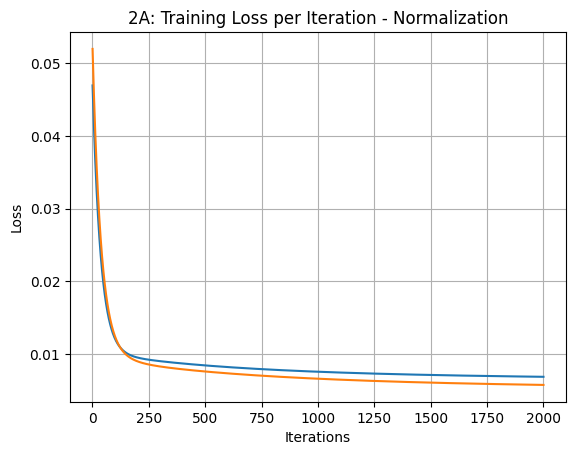

In [ ]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2A: Training Loss per Iteration - Normalization')


In [ ]:
scaler = StandardScaler()

df_nrm_train = raw_df_train

df_nrm_train[['price']] = scaler.fit_transform(raw_df_train[['price']])
df_nrm_train[categorical_cols_1] = scaler.fit_transform(raw_df_train[categorical_cols_1])

Y_nrm_train = df_nrm_train[['price']].to_numpy()

m_nrm_train = len(Y_nrm_train)

X_nrm_train = df_nrm_train[categorical_cols_1].to_numpy()
X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))


In [ ]:
df_nrm_test = raw_df_test

df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
df_nrm_test[categorical_cols_1] = scaler.fit_transform(df_nrm_test[categorical_cols_1])

Y_nrm_test = df_nrm_test[['price']].to_numpy()

m_nrm_test = len(Y_nrm_test)

X_nrm_test = df_nrm_test[categorical_cols_1].to_numpy()
X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))


In [ ]:
iterations = 2000
alpha = 0.01

theta = np.zeros((6,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, iterations)


Text(0.5, 1.0, '2A: Training Loss per Iteration - Standardization')

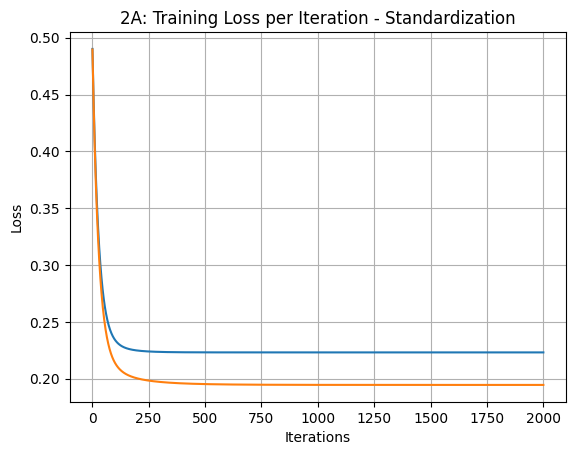

In [ ]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2A: Training Loss per Iteration - Standardization')


In [ ]:
scaler = MinMaxScaler()

df_nrm_train = raw_df_train

df_nrm_train[['price']] = scaler.fit_transform(raw_df_train[['price']])
df_nrm_train[categorical_cols_2] = scaler.fit_transform(raw_df_train[categorical_cols_2])

Y_nrm_train = df_nrm_train[['price']].to_numpy()

m_nrm_train = len(Y_nrm_train)

X_nrm_train = df_nrm_train[categorical_cols_2].to_numpy()
X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))


In [ ]:
df_nrm_test = raw_df_test

df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
df_nrm_test[categorical_cols_2] = scaler.fit_transform(df_nrm_test[categorical_cols_2])

Y_nrm_test = df_nrm_test[['price']].to_numpy()

m_nrm_test = len(Y_nrm_test)

X_nrm_test = df_nrm_test[categorical_cols_2].to_numpy()
X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))


In [ ]:
iterations = 4000
alpha = 0.01

theta = np.zeros((12,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, iterations)


Text(0.5, 1.0, '2b: Training Loss per Iteration - Normalization')

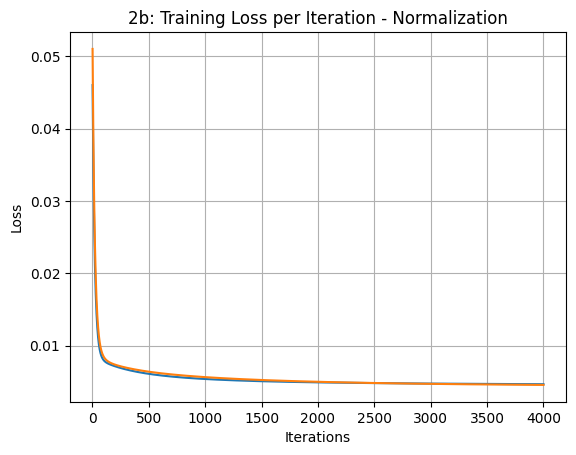

In [ ]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2b: Training Loss per Iteration - Normalization')


In [ ]:
scaler = StandardScaler()

df_nrm_train = raw_df_train

df_nrm_train[['price']] = scaler.fit_transform(raw_df_train[['price']])
df_nrm_train[categorical_cols_2] = scaler.fit_transform(raw_df_train[categorical_cols_2])

Y_nrm_train = df_nrm_train[['price']].to_numpy()

m_nrm_train = len(Y_nrm_train)

X_nrm_train = df_nrm_train[categorical_cols_2].to_numpy()
X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))


In [ ]:
df_nrm_test = raw_df_test

df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
df_nrm_test[categorical_cols_2] = scaler.fit_transform(df_nrm_test[categorical_cols_2])

Y_nrm_test = df_nrm_test[['price']].to_numpy()

m_nrm_test = len(Y_nrm_test)

X_nrm_test = df_nrm_test[categorical_cols_2].to_numpy()
X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))


In [ ]:
iterations = 2000
alpha = 0.01

theta = np.zeros((12,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, iterations)


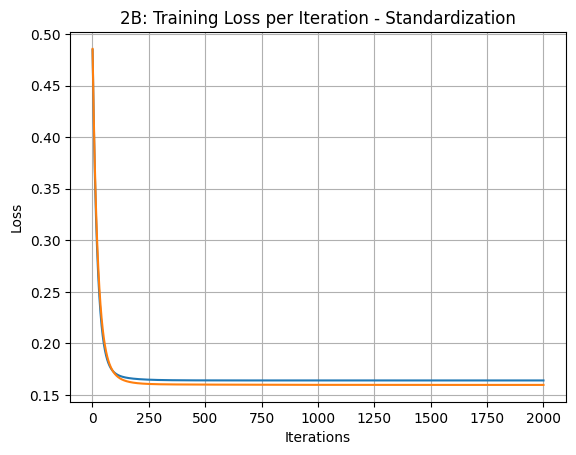

In [ ]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2B: Training Loss per Iteration - Standardization')
X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test = feature_scaling(raw_df_train, raw_df_test, categorical_cols_1, MinMaxScaler())


In [ ]:
def penalty_loss(X_values, Y_values, theta, alpha):
  m = len(Y_values)
  h= X_values.dot(theta)
  err = np.subtract(h,Y_values)
  square_error = np.square(err)
  sum = (1/ (2*m)) * (np.sum(square_error) + alpha * np.sum(np.square(theta[1:])))
  return sum

def parameter_penalty(x_train, x_test, y_train, y_test, theta, iterations, learning_rate, alpha):
  n = len(y_train)
  cost_history_train = np.zeros(iterations)
  cost_history_val = np.zeros(iterations)
  for i in range(iterations):
    h = x_train.dot(theta)
    error = np.subtract(h,y_train)
    diff = (1/(n))*((x_train.transpose()).dot(error) + alpha * np.vstack((np.array([0]), theta[1:])))
    theta = theta - learning_rate * diff
    cost_history_train[i] = penalty_loss(x_train, y_train, theta, alpha)
    cost_history_val[i] = penalty_loss(x_test,y_test, theta, 0)
  return theta, cost_history_train, cost_history_val


In [ ]:
iterations = 4000
penalty = 1
alpha = 0.01

theta = np.zeros((6,1))
theta, training_loss_hist, validation_loss_hist = parameter_penalty(X_nrm_train, X_nrm_test, Y_nrm_train, Y_nrm_test, theta, iterations, alpha, penalty)

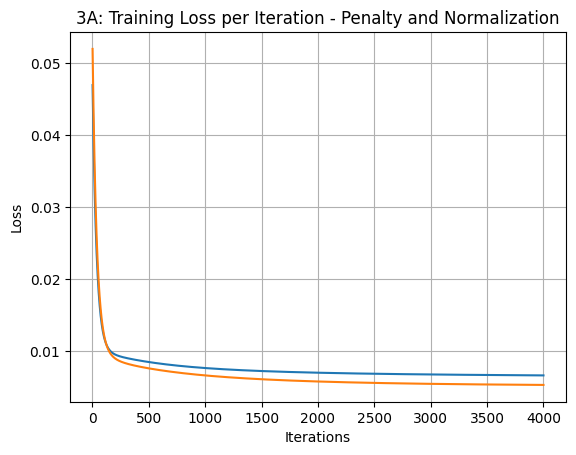

In [ ]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('3A: Training Loss per Iteration - Penalty and Normalization')
X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test = feature_scaling(raw_df_train, raw_df_test, categorical_cols_2, MinMaxScaler())


In [ ]:
iterations = 4000
penalty = 10
alpha = 0.01

theta = np.zeros((12,1))

theta, training_loss_hist, validation_loss_hist = parameter_penalty(X_nrm_train, X_nrm_test, Y_nrm_train, Y_nrm_test, theta, iterations, alpha, penalty)


Text(0.5, 1.0, '3B: Training Loss per Iteration - Penalty and Normalization')

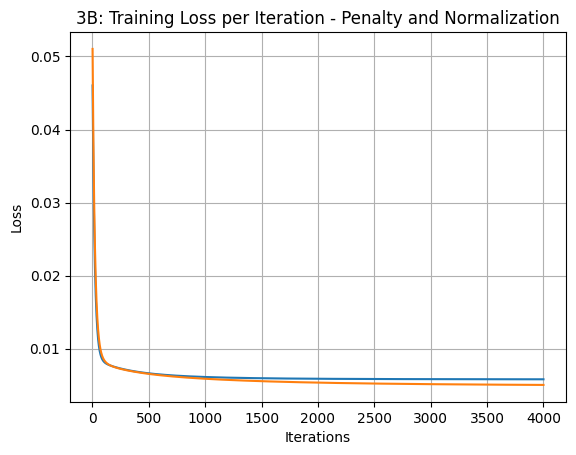

In [ ]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('3B: Training Loss per Iteration - Penalty and Normalization')